# MLBD : Project on the music dataset

The base subject is : Predicting a playlist that satisfies group members (e.g., to decide the music to play in a party). By playlist we mean a group of artist, not necessarily tracks.

Research questions :
- 

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
DATA_FOLDER = 'data/'
TOP_FOLDER = DATA_FOLDER + 'lastfm-dataset-360k/'
TIMELINE_FOLDER = DATA_FOLDER + 'lastfm-dataset-1k/'

top_user = pd.read_csv(TOP_FOLDER + 'usersha1-profile.tsv', sep = '\t', error_bad_lines = False, header = None)
top_data = pd.read_csv(TOP_FOLDER + 'usersha1-artmbid-artname-plays.tsv', sep = '\t', error_bad_lines = False, header = None)

timeline_user = pd.read_csv(TIMELINE_FOLDER + 'userid-profile.tsv', sep = '\t', error_bad_lines = False, header = 0)
timeline_data = pd.read_csv(TIMELINE_FOLDER + 'userid-timestamp-artid-artname-traid-traname.tsv', sep = '\t', error_bad_lines = False, header = None)

b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [3]:
top_user.rename(columns = {0 : 'ID', 1 : 'Gender', 2 : 'Age', 3 : 'Country', 4 : 'Registered'}, inplace = True)
top_data.rename(columns = {0 : 'ID', 1 : 'Artist_ID', 2 : 'Artist', 3 : 'Plays'}, inplace = True)
timeline_user.rename(columns = {'#id' : 'ID', 'gender' : 'Gender', 'age' : 'Age', 'country' : 'Country', 'registered' : 'Registered'}, inplace = True)
timeline_data.rename(columns = {0 : 'ID', 1 : 'Timestamp', 2 : 'Artist_ID', 3 : 'Artist', 4 : 'Track_ID', 5 : 'Track'}, inplace = True)

In [4]:
top_user.head()

,ID,Gender,Age,Country,Registered
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [5]:
top_data.head()

,ID,Artist_ID,Artist,Plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [6]:
timeline_user.head()

,ID,Gender,Age,Country,Registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [7]:
timeline_data.head()

,ID,Timestamp,Artist_ID,Artist,Track_ID,Track
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


### Analysis

In [18]:
max_track = timeline_data.groupby(['ID', 'Track', 'Artist']).count()['Timestamp'].sort_values().groupby(level = 0).tail(1)

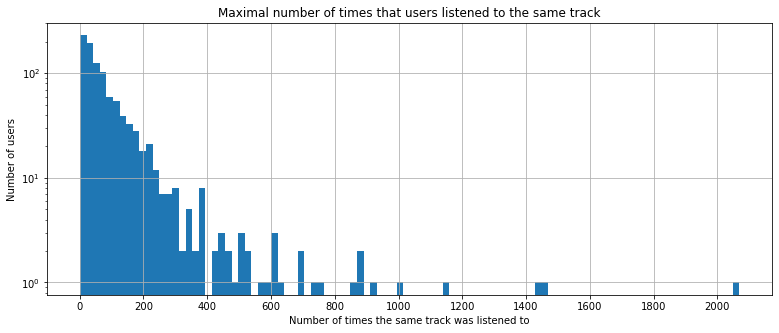

In [39]:
max_track.reset_index().hist(bins = 100, figsize = (13, 5))
plt.yscale('log')
plt.title('Maximal number of times that users listened to the same track')
plt.xlabel('Number of times the same track was listened to')
plt.ylabel('Number of users')
_ = plt.xticks(range(0, 2200, 200))

We can observe that most people did not listen to the same song for more than 200 times, with a big chunk of it found under 100.

In [41]:
max_top = top_data.groupby(['ID'])['Plays'].max()

Text(0, 0.5, 'Number of users')

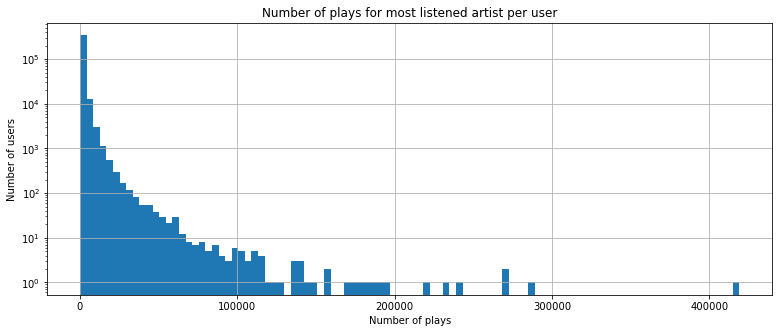

In [43]:
max_top.reset_index().hist(bins = 100, figsize = (13, 5))
plt.yscale('log')
plt.title('Number of plays for most listened artist per user')
plt.xlabel('Number of plays')
plt.ylabel('Number of users')

In [48]:
top_data['Plays'].max()

419157

In [45]:
top_data[top_data['Plays'] == 419157]

,ID,Artist_ID,Artist,Plays
9654928,8d0384537845e7f2b1b8b3e8a9f67eb8d9439794,dcaa4f81-bfb7-44eb-8594-4e74f004b6e4,nofx,419157


In [49]:
top_user[top_user['ID'] == '8d0384537845e7f2b1b8b3e8a9f67eb8d9439794']

,ID,Gender,Age,Country,Registered
197654,8d0384537845e7f2b1b8b3e8a9f67eb8d9439794,m,31.0,Austria,"Nov 11, 2005"


Once again, most user can be found at the start of scale, but some users are truly amazing, with the max plays sitting at 419157. After some research, nofx, the artist this user has been listening to, mainly makes music of about 2 minutes, still this user has more or less listened to 1.6 years of nofx in about 4 years.

Text(0, 0.5, 'Number of artists')

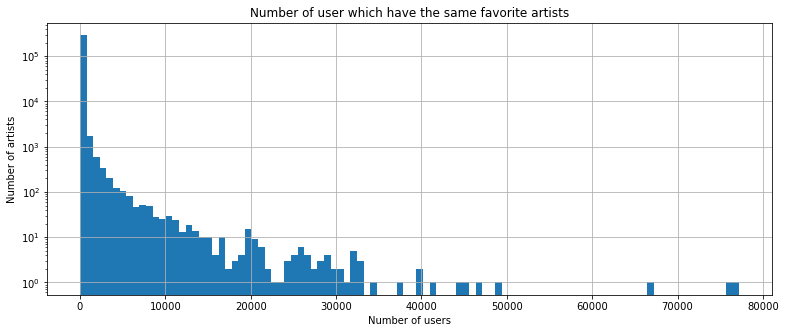

In [50]:
top_data.groupby('Artist').count()['ID'].reset_index().hist(bins = 100, figsize = (13, 5))
plt.yscale('log')
plt.title('Number of user which have the same favorite artists')
plt.xlabel('Number of users')
plt.ylabel('Number of artists')

We see that most artist have very few users in common, but the fact that quite some artists have more than 10000 users listening to them seems promising.